In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import os,sys
module_path = os.path.abspath(os.path.join('/Users/tu/Desktop/trec/Parrot/venv/src'))
sys.path.append(module_path)
from parrot.core import *
from parrot.model import *


In [8]:
base = "/Users/tu/Desktop/trec/"
dataset = DataSet.load(
    base + "/index/ap90",
    base + "/topics/ap90-51-100",
    base + "/qrels/ap90-51-100",
    True
)
print(dataset.collection)

Collection:/Users/tu/Desktop/trec/index/ap90
total_term_freq:25556408
num_docs:78583
num_terms:175559


In [9]:
# parameter sensitivity analysis for the BM25 model

b_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
map_list = []
for b in b_list:
    model = BM25Model(b, k1=0.9)
    run = model.run(dataset)
    map_list.append(run.avg_prec())

for k in range(len(b_list)):
    print(b_list[k], "\t", map_list[k])

100%|██████████| 50/50 [00:11<00:00,  4.21it/s]

0 	 0.23789823117517045
0.1 	 0.2415486726603847
0.2 	 0.2438023130699744
0.3 	 0.2457401587010623
0.4 	 0.24788153545871214
0.5 	 0.2486973303487932
0.6 	 0.25344503346345015
0.7 	 0.24994706180966006
0.8 	 0.2456743012129826
0.9 	 0.24464340151281946


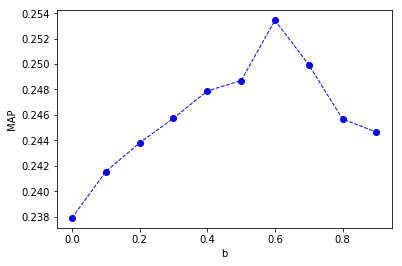

In [10]:
plot_trend("b", b_list, "MAP", map_list)